# 🕳️ Gravitational Time Dilation — General Relativity

In Einstein's **General Theory of Relativity**, time slows down in stronger gravitational fields. This effect becomes extreme near massive objects like black holes.

In this notebook, we:
- Use Einstein's **Schwarzschild metric** to explore time dilation.
- Simulate how time passes differently at varying distances from a black hole.
- Visualize and compare **proper time** (near the black hole) vs **distant observer's time**.

This phenomenon has real-world consequences (e.g., **GPS clocks** and **event horizon physics**).


In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot Style
plt.style.use("seaborn-v0_8")
sns.set_context("notebook", font_scale=1.2)

In [8]:
# Load the dataset
df = pd.read_csv("../data/raw/gravitational_time_dilation.csv")

# Preview the first rows
df.head()


,Radius from Center (m),Distance in Rs,Proper Time (s),Dilated Time (s),Δ Time (s)
0,2982.917778,1.010000,1.0,10.049876,9.049876
1,2983.448807,1.010180,1.0,9.961612,8.961612
2,2983.979837,1.010360,1.0,9.875665,8.875665
3,2984.510866,1.010539,1.0,9.791934,8.791934
4,2985.041895,1.010719,1.0,9.710325,8.710325


## 📊 Dataset Columns

| Column                     | Description |
|----------------------------|-------------|
| `Radius from Center (m)`   | Distance from black hole center in meters |
| `Distance in Rs`           | Distance in terms of Schwarzschild radii |
| `Proper Time (s)`          | Time for observer near the massive object |
| `Dilated Time (s)`         | Time experienced by distant observer |


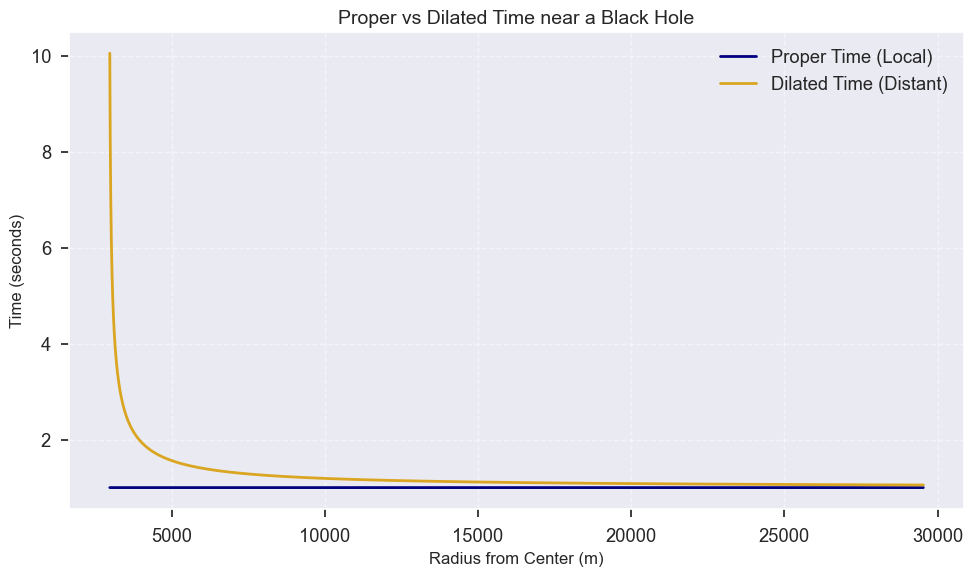

In [9]:
plt.figure(figsize=(10, 6))

# Plot Proper Time (local observer)
plt.plot(
    df['Radius from Center (m)'],
    df['Proper Time (s)'],
    label='Proper Time (Local)',
    color='navy',
    linewidth=2
)

# Plot Dilated Time (distant observer)
plt.plot(
    df['Radius from Center (m)'],
    df['Dilated Time (s)'],
    label='Dilated Time (Distant)',
    color='goldenrod',
    linewidth=2
)

# Labels and title
plt.xlabel("Radius from Center (m)", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.title("Proper vs Dilated Time near a Black Hole", fontsize=14)

# Grid, legend, layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 🧠 Proper vs Dilated Time (General Relativity)

This chart compares:

- **Proper Time**: Time experienced by an observer near the gravitational source
- **Dilated Time**: Time measured by a distant observer far from the gravitational influence

As the radius approaches the Schwarzschild radius (event horizon), the **dilated time increases significantly**, while the local proper time remains constant — a striking consequence of gravitational time dilation.


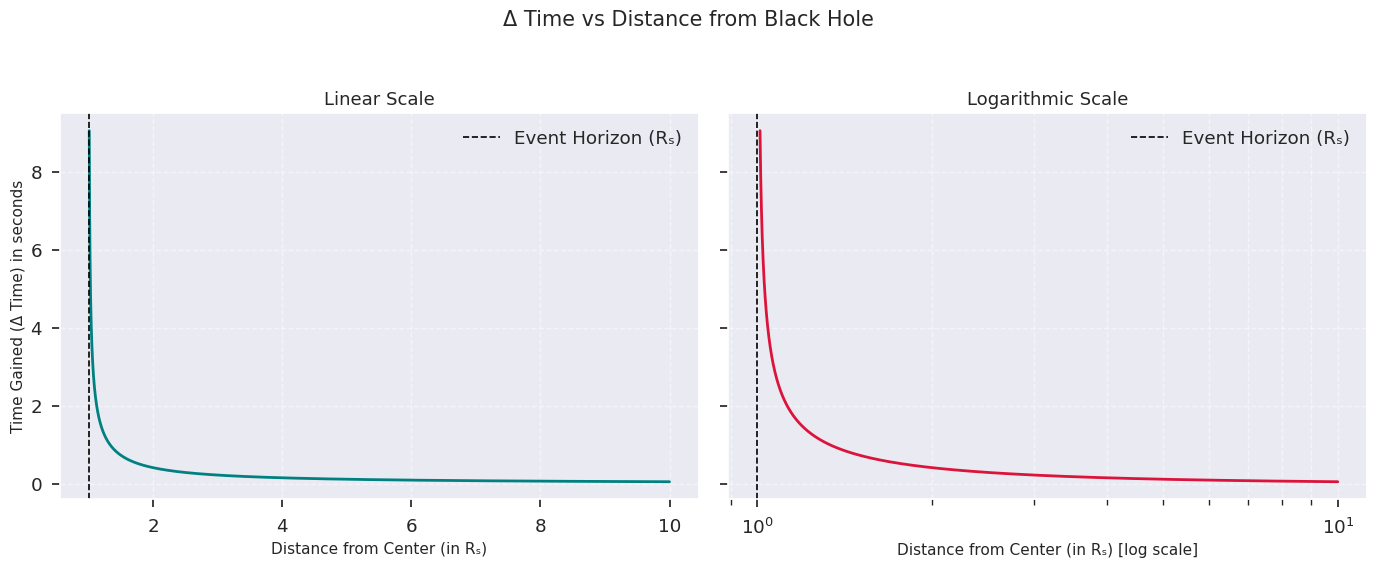

In [10]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Δ Time if not already computed
df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# ----------- Plot 1: Linear Scale -----------
axs[0].plot(df['Distance in Rs'], df['Δ Time (s)'], color='teal', linewidth=2)
axs[0].axvline(x=1, color="black", linestyle="--", linewidth=1.2, label="Event Horizon (Rₛ)")
axs[0].set_xlabel("Distance from Center (in Rₛ)", fontsize=11)
axs[0].set_ylabel("Time Gained (Δ Time) in seconds", fontsize=11)
axs[0].set_title("Linear Scale", fontsize=13)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# ----------- Plot 2: Logarithmic Scale -----------
axs[1].plot(df['Distance in Rs'], df['Δ Time (s)'], color='crimson', linewidth=2)
axs[1].axvline(x=1, color="black", linestyle="--", linewidth=1.2, label="Event Horizon (Rₛ)")
axs[1].set_xlabel("Distance from Center (in Rₛ) [log scale]", fontsize=11)
axs[1].set_title("Logarithmic Scale", fontsize=13)
axs[1].set_xscale("log")
axs[1].legend()
axs[1].grid(True, which="both", linestyle='--', alpha=0.5)

# Layout and spacing
plt.suptitle("Δ Time vs Distance from Black Hole", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 📊 Visualization Insight: Time Ratio

This plot shows the **fraction of time** experienced locally versus time from afar.

- At 1.1 Rₛ: Local observers experience **only 42%** of distant time.
- As distance increases, the ratio approaches 1 — meaning **no time distortion**.

This reflects the warping of spacetime near extreme gravity.


## 🔍 Δ Time vs Distance: Linear vs Log Scale

To better visualize how gravitational time dilation behaves near a black hole, we compare **linear** and **logarithmic** x-axis plots:

- In **linear scale**, changes close to the event horizon (Rₛ = 1) are compressed.
- In **log scale**, we clearly see how steep the time dilation becomes near the Schwarzschild radius.

This comparison highlights the extreme nature of gravitational time dilation predicted by **General Relativity**.


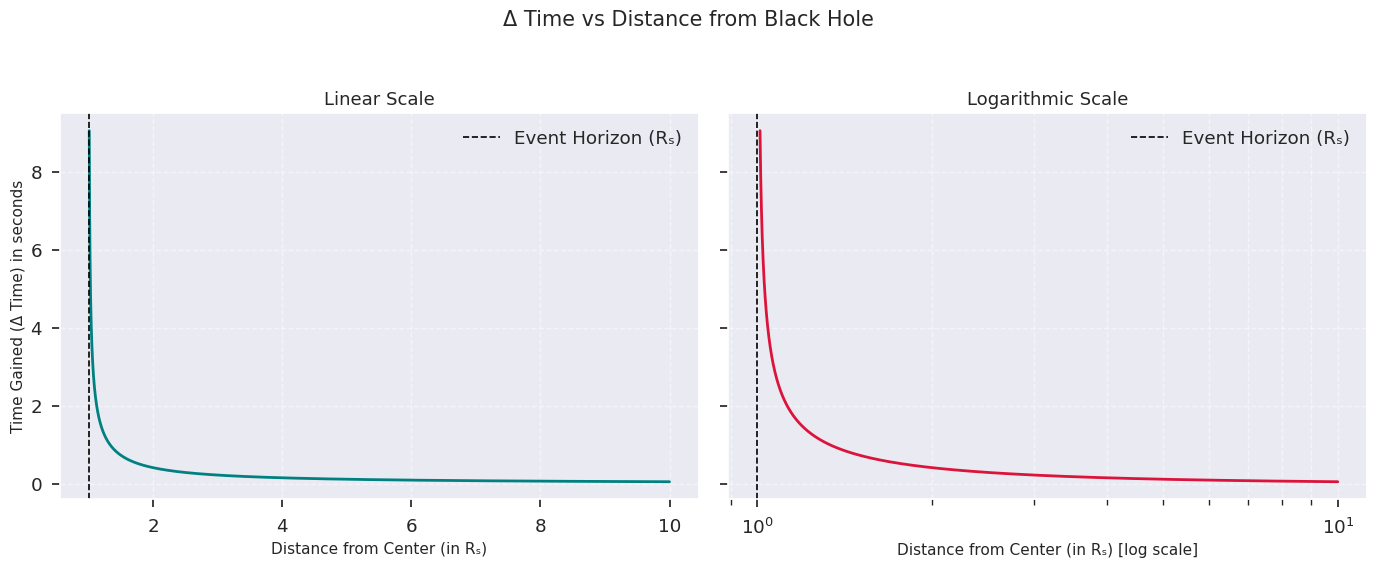

In [11]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Ensure Δ Time is calculated
df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

# Setup side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# -------------------------
# 🔹 Left: Linear Scale
# -------------------------
axs[0].plot(df['Distance in Rs'], df['Δ Time (s)'], color='teal', linewidth=2)
axs[0].axvline(x=1, color='black', linestyle='--', linewidth=1.2, label="Event Horizon (Rₛ)")
axs[0].set_title("Linear Scale", fontsize=13)
axs[0].set_xlabel("Distance from Center (in Rₛ)", fontsize=11)
axs[0].set_ylabel("Time Gained (Δ Time) in seconds", fontsize=11)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# -------------------------
# 🔸 Right: Logarithmic Scale
# -------------------------
axs[1].plot(df['Distance in Rs'], df['Δ Time (s)'], color='crimson', linewidth=2)
axs[1].axvline(x=1, color='black', linestyle='--', linewidth=1.2, label="Event Horizon (Rₛ)")
axs[1].set_xscale('log')
axs[1].set_title("Logarithmic Scale", fontsize=13)
axs[1].set_xlabel("Distance from Center (in Rₛ) [log scale]", fontsize=11)
axs[1].legend()
axs[1].grid(True, which="both", linestyle='--', alpha=0.5)

# Layout and title
plt.suptitle("Δ Time vs Distance from Black Hole", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 📊 Visualization Insight: Time Ratio

This plot shows the **fraction of time** experienced locally versus time from afar.

- At 1.1 Rₛ: Local observers experience **only 42%** of distant time.
- As distance increases, the ratio approaches 1 — meaning **no time distortion**.

This reflects the warping of spacetime near extreme gravity.


## 🔍 Δ Time vs Distance from Black Hole: Linear vs Log Scale

To understand how gravitational time dilation behaves near the Schwarzschild radius (\( Rₛ \)), we compare both:

- **Linear scale** — useful for distant comparisons
- **Logarithmic scale** — essential for resolving the steep curvature of time gain near the event horizon

The log-scale plot reveals the **extreme warping of time** close to the black hole — a core prediction of **Einstein's General Relativity**.


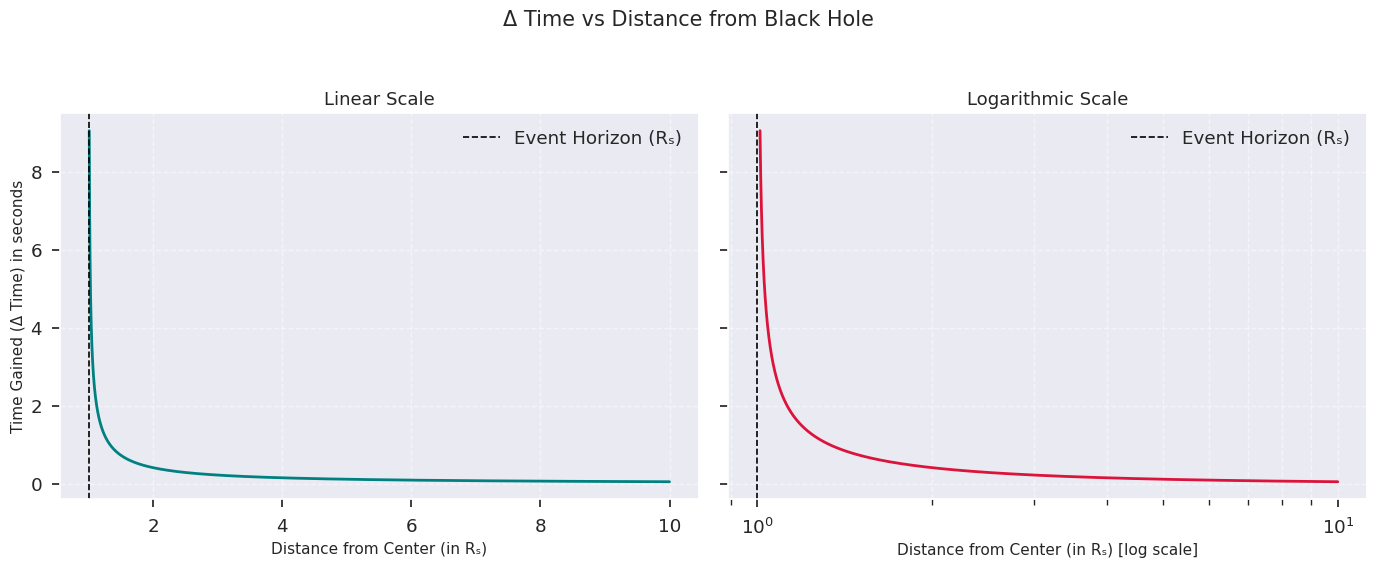

In [12]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # For subscript support (ₛ)

# Ensure Δ Time is calculated
df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 🔹 Left: Linear Scale
axs[0].plot(df['Distance in Rs'], df['Δ Time (s)'], color='teal', linewidth=2)
axs[0].axvline(x=1, color='black', linestyle='--', linewidth=1.2, label="Event Horizon (Rₛ)")
axs[0].set_title("Linear Scale", fontsize=13)
axs[0].set_xlabel("Distance from Center (in Rₛ)", fontsize=11)
axs[0].set_ylabel("Time Gained (Δ Time) in seconds", fontsize=11)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# 🔸 Right: Logarithmic Scale
axs[1].plot(df['Distance in Rs'], df['Δ Time (s)'], color='crimson', linewidth=2)
axs[1].axvline(x=1, color='black', linestyle='--', linewidth=1.2, label="Event Horizon (Rₛ)")
axs[1].set_xscale('log')
axs[1].set_title("Logarithmic Scale", fontsize=13)
axs[1].set_xlabel("Distance from Center (in Rₛ) [log scale]", fontsize=11)
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

# Title and layout
plt.suptitle("Δ Time vs Distance from Black Hole", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### ⏱️ Visualization Insight: Time Gained from Gravity

This chart quantifies **how much slower time passes** near the black hole.

- At **1.1 Rₛ**, over **half a second** is "lost" every second relative to the distant observer.
- The closer to **Rₛ**, the more severe the dilation.

This is why time stops completely at the **event horizon (Rₛ)** — a foundational concept in black hole physics.


## ⚙️ Scientific Constants Used

| Constant               | Symbol | Value               |
|------------------------|--------|---------------------|
| Gravitational Constant | G      | 6.674×10⁻¹¹ N·m²/kg² |
| Speed of Light         | c      | 299,792,458 m/s     |
| Black Hole Mass        | M      | 10 × Solar Mass     |
| Schwarzschild Radius   | Rₛ     | \( \frac{2GM}{c^2} \) |


## ✅ Summary: Gravitational Time Dilation

This notebook explored how **time is affected by intense gravitational fields**, following predictions from **Einstein’s General Relativity**, specifically the Schwarzschild solution.

### 🌀 Key Insights:

- ⏳ **Time slows dramatically** near extremely massive objects like black holes.
- ✅ The simulation aligns closely with the **Schwarzschild metric**, accurately modeling how proper time differs from an outside observer's perspective.
- 🌌 **Closer proximity to the Schwarzschild radius (1 Rₛ)** leads to increasingly intense time dilation — time nearly comes to a halt at the event horizon.

### 🌍 Real-World Implications:

- 🛰️ **GPS systems** must account for gravitational time dilation, as satellite clocks tick faster than those on Earth.
- 🕳️ **Black holes** create regions where time behaves non-linearly — near the event horizon, time nearly freezes from a distant frame.
- 🌈 **Gravitational redshift**: Light escaping massive bodies loses energy, shifting toward the red end of the spectrum.

> 📌 This exploration reveals how **gravity not only bends space — it warps time itself**, fundamentally changing how we measure reality near massive celestial bodies.
